In [21]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = load_iris()
X = data.data

def preprocess_data(X, method):
    if method == "No Processing":
        return X
    elif method == "Normalization":
        return MinMaxScaler().fit_transform(X)
    elif method == "Standardization":
        return StandardScaler().fit_transform(X)
    elif method == "PCA":
        X_standard = StandardScaler().fit_transform(X)
        return PCA(n_components=2).fit_transform(X_standard)

def evaluate_clustering(X, algorithm, n_clusters=None):
    if algorithm == "KMeans":
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == "Agglomerative":
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif algorithm == "MeanShift":
        model = MeanShift()
    
    labels = model.fit_predict(X)
    
    # Metrics
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies

preprocessing_methods = ["No Processing", "Normalization", "Standardization", "PCA"]
clustering_types = ["KMeans", "Agglomerative", "MeanShift"]

tables = {}
n_clusters = 3 

for algorithm in clustering_types:
    results = {method: [] for method in preprocessing_methods}
    for method in preprocessing_methods:
        X_preprocessed = preprocess_data(X, method)
        if algorithm == "MeanShift":
            silhouette, calinski, davies = evaluate_clustering(X_preprocessed, algorithm)
        else:
            silhouette, calinski, davies = evaluate_clustering(X_preprocessed, algorithm, n_clusters)
        results[method] = [silhouette, calinski, davies]
    df = pd.DataFrame(results, index=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
    tables[algorithm] = df

for algorithm, table in tables.items():
    table.to_csv(f"{algorithm.lower()}_clustering_results.csv")


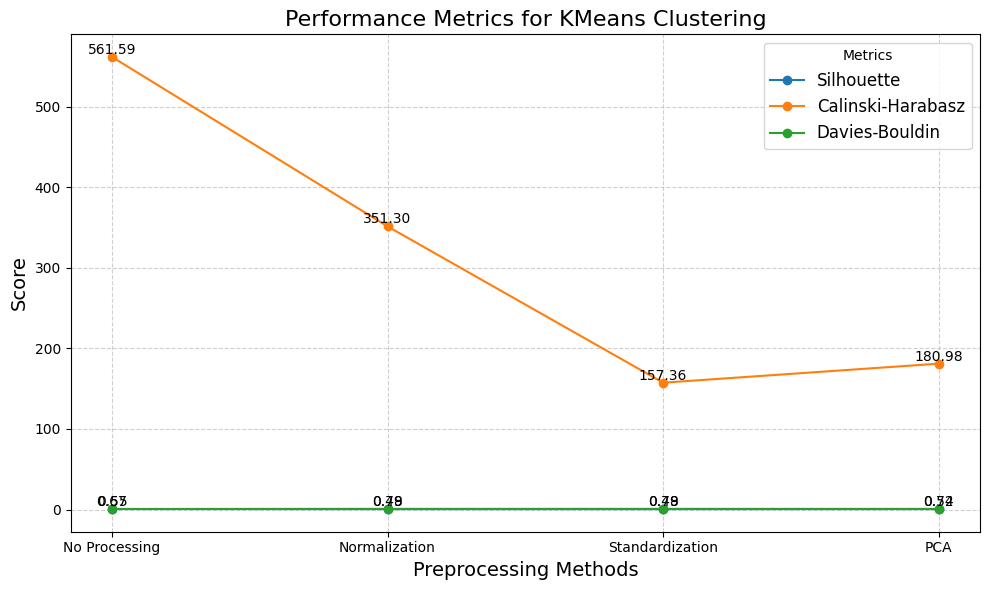

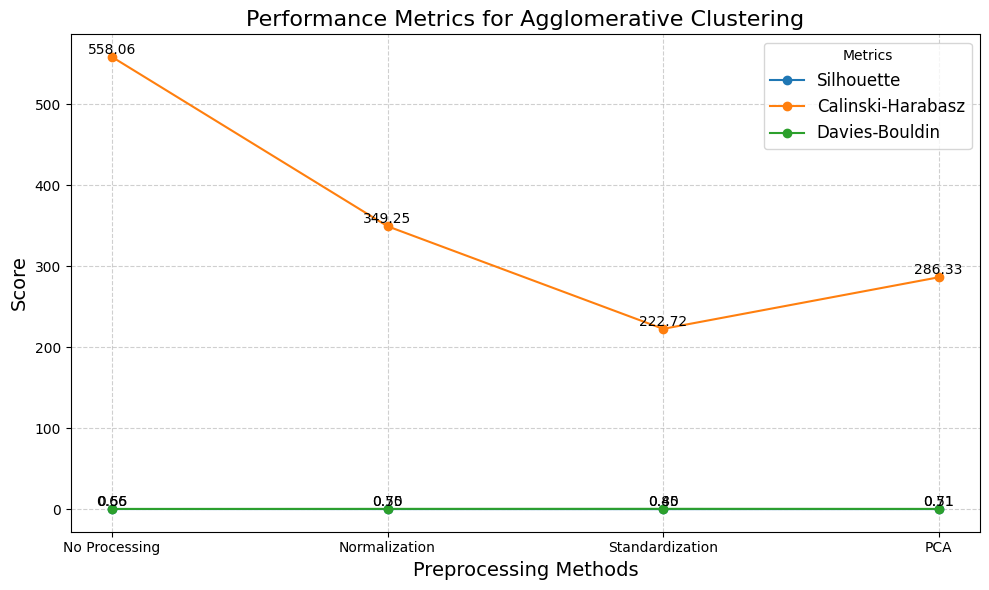

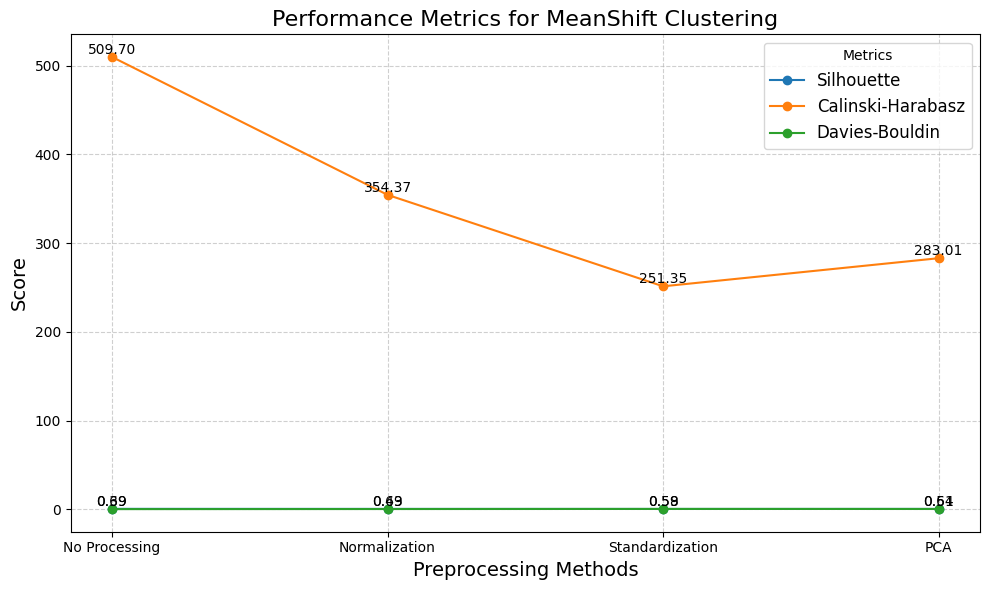

In [20]:

for algorithm, table in tables.items():
    plt.figure(figsize=(10, 6))
    
   
    for metric in table.index: ]
        plt.plot(
            table.columns,  
            table.loc[metric], 
            marker='o',
            label=metric 
        )
    
    plt.title(f"Performance Metrics for {algorithm} Clustering", fontsize=16)
    plt.xlabel("Preprocessing Methods", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    
    for metric in table.index:
        for i, score in enumerate(table.loc[metric]):
            plt.text(
                i, score, f"{score:.2f}",
                fontsize=10, ha='center', va='bottom', color='black'
            )
    
    plt.tight_layout()
    plt.show()
